## Exercise: Analyzing and Visualizing Data with Matplotlib, Pandas, and NumPy

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

### Part 1: Data Preparation

In this part of the exercise, you will use Pandas and NumPy to load and preprocess data. For this exercise, we will use a dataset of housing prices in Boston.

1.  Download the Boston Housing dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) and save it to your local computer.
2.  Load the dataset into a Pandas DataFrame and examine its contents. The dataset should have 506 rows and 14 columns.
3.  Use NumPy to calculate some basic statistics about the dataset, such as the mean, median, standard deviation, minimum, and maximum values of each column.
4.  Clean the dataset by removing any missing or invalid values. You can use Pandas' `dropna()` method for this.



In [3]:
!pip install pandas yfinance matplotlib seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\A507\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('housing.data', delim_whitespace=True, header=None, names=names)

print(df.head())
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


In [3]:
import numpy as np

crim_mean = df['CRIM'].apply(np.mean)
print(crim_mean)

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64


### Part 2: Data Visualization

In this part of the exercise, you will use Matplotlib to create some visualizations of the housing data.

1.  Create a scatter plot of the housing prices (`MEDV`) versus the number of rooms (`RM`). Label the axes and add a title to the plot.
2.  Create a histogram of the housing prices (`MEDV`). Label the axes and add a title to the plot.
3.  Create a box plot of the housing prices (`MEDV`) grouped by the proximity to employment centers (`DIS`). Label the axes and add a title to the plot.

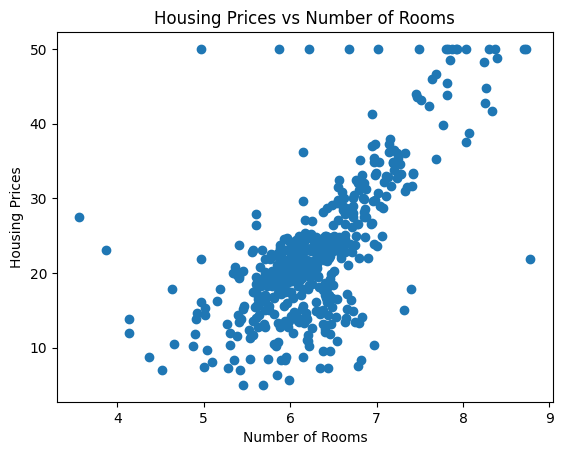

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['RM'], df['MEDV'])
plt.title('Housing Prices vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Prices')
plt.show()

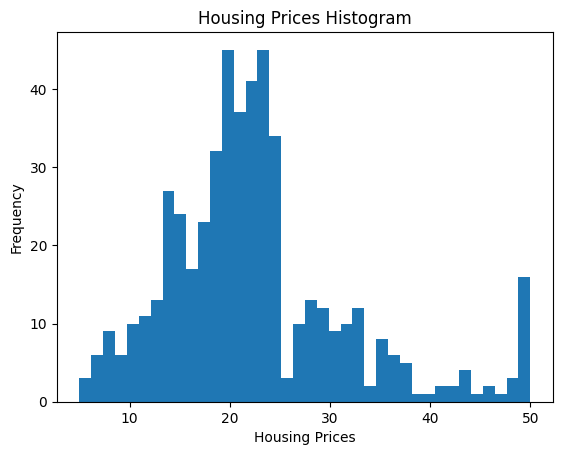

In [8]:
plt.hist(df['MEDV'], bins=38)
plt.title('Housing Prices Histogram')
plt.xlabel('Housing Prices')
plt.ylabel('Frequency')
plt.show()

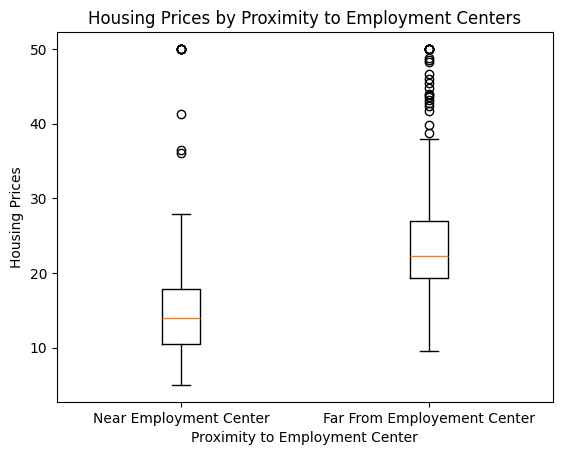

In [14]:
plt.boxplot([df['MEDV'][df['DIS'] <= 2], df['MEDV'][df['DIS'] > 2]])
plt.xticks([1, 2], ['Near Employment Center', 'Far From Employement Center'])
plt.title('Housing Prices by Proximity to Employment Centers')
plt.xlabel('Proximity to Employment Center')
plt.ylabel('Housing Prices')
plt.show()

### Part 3: Data Analysis

In this part of the exercise, you will use Pandas and NumPy to perform some basic data analysis on the housing data.

1.  Calculate the correlation coefficient between the housing prices (`MEDV`) and the number of rooms (`RM`) using NumPy's `corrcoef()` method.
2.  Calculate the mean housing price (`MEDV`) for each neighborhood (`CHAS`). You can use Pandas' `groupby()` method for this.
3.  Calculate the percentage of houses that have more than 7 rooms (`RM`). You can use Pandas' `value_counts()` method for this.

In [13]:
import numpy as np

corr = np.corrcoef(df['MEDV'], df['RM'])[0, 1]
print(f"Correlation coefficient between housing prices amd number of rooms : \n{corr:2}")

mean_by_chas = df.groupby('ZN')['MEDV'].mean()
print(f"\nMean housing price for each neighborhood: \n{mean_by_chas}")

percent_more_then_7 = (df['RM'] > 7).value_counts(normalize=True) * 100
print(f"\nPercentage of houses with more than 7 rooms: \n{percent_more_then_7}")

Correlation coefficient between housing prices amd number of rooms : 
0.6953599470715396

Mean housing price for each neighborhood: 
ZN
0.0      20.473387
12.5     20.130000
17.5     33.000000
18.0     24.000000
20.0     35.466667
21.0     22.150000
22.0     25.320000
25.0     22.440000
28.0     22.833333
30.0     22.500000
33.0     31.525000
34.0     27.166667
35.0     23.066667
40.0     29.900000
45.0     33.433333
52.5     23.433333
55.0     25.700000
60.0     25.725000
70.0     25.433333
75.0     28.200000
80.0     27.400000
82.5     33.200000
85.0     23.900000
90.0     38.340000
95.0     41.575000
100.0    31.600000
Name: MEDV, dtype: float64

Percentage of houses with more than 7 rooms: 
False    87.351779
True     12.648221
Name: RM, dtype: float64


### Part 4: Putting it all together

In this final part of the exercise, you will use all three libraries to create a complete data analysis and visualization pipeline.

1.  Load the dataset and preprocess it as before.
2.  Create the scatter plot and histogram as before.
3.  Calculate the correlation coefficient between the housing prices and the number of rooms as before.
4.  Group the data by the proximity to employment centers and calculate the mean housing prices as before.
5.  Create a bar chart of the mean housing prices by proximity to employment centers. Label the axes and add a title to the plot.